In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import os

In [2]:
df_dict = defaultdict(list)
for checkpoint in range(1, 6):
    for run in range(1, 6):
        df = pd.read_csv(os.path.join(f'cmsb_run_{run}', f'sexist_data_train_{checkpoint}.csv'))
        if run == 1 and checkpoint != 5:
            df = df[['id', 'text', 'numeric_labels', 'sexist', 'predicted_label', 'correct_yx', f'pvi_{run}', f'el2n_scores_{run}']]
            df = df.rename(columns = {'predicted_label': f'predicted_label_{run}'})
            df_dict[checkpoint].append(df)
        elif run == 1 and checkpoint == 5:
            df = df[['id', 'text', 'numeric_labels', 'sexist', 'predicted_label', 'correct_yx', 
                     f'pvi_{run}', f'el2n_scores_{run}', f'vog_scores_{run}']]
            df = df.rename(columns = {'predicted_label': f'predicted_label_{run}'})
            df_dict[checkpoint].append(df)
        elif run != 1 and checkpoint != 5:
            df = df[[f'pvi_{run}', f'el2n_scores_{run}', 'predicted_label']]
            df = df.rename(columns = {'predicted_label': f'predicted_label_{run}'})
            df_dict[checkpoint].append(df)
        elif run != 1 and checkpoint == 5:
            df = df[[f'pvi_{run}', f'el2n_scores_{run}', f'vog_scores_{run}', 'predicted_label']]
            df = df.rename(columns = {'predicted_label': f'predicted_label_{run}'})
            df_dict[checkpoint].append(df)      

In [3]:
for checkpoint in range(1, 6):
    df_dict[checkpoint] = pd.concat(df_dict[checkpoint], axis = 1)
    df_dict[checkpoint]['average_pvi'] = df_dict[checkpoint][[f'pvi_{i}' for i in range(1, 6)]].mean(skipna = True, axis = 1)
    df_dict[checkpoint]['average_el2n'] = df_dict[checkpoint][[f'el2n_scores_{i}' for i in range(1, 6)]].mean(skipna = True, axis = 1)
    df_dict[checkpoint] = df_dict[checkpoint].drop(columns = [f'pvi_{i}' for i in range(1, 6)])
    df_dict[checkpoint] = df_dict[checkpoint].drop(columns = [f'el2n_scores_{i}' for i in range(1, 6)])
    if checkpoint == 5:
        df_dict[checkpoint]['average_vog'] = df_dict[checkpoint][[f'vog_scores_{i}' for i in range(1, 6)]].mean(skipna = True, axis = 1)
        df_dict[checkpoint] = df_dict[checkpoint].drop(columns = [f'vog_scores_{i}' for i in range(1, 6)])    
        

In [4]:
for checkpoint in range(1, 6):
    df_dict[checkpoint].to_csv(os.path.join('score_results', f'sexist_data_train_{checkpoint}.csv'), index = False)

In [5]:
def get_misclassification(true, labels):
    mis_class = 0
    for label in labels:
        if true != int(label[label.index('_') + 1: ]):
            mis_class += 1
    return mis_class

In [6]:
df_final = pd.read_csv(os.path.join('score_results', 'sexist_data_train_5.csv'))
df_final

,id,text,numeric_labels,sexist,predicted_label_1,correct_yx,predicted_label_2,predicted_label_3,predicted_label_4,predicted_label_5,average_pvi,average_el2n,average_vog
0,2651,SIIIIGH http://t.co/BpJX5JwhlH,0,False,LABEL_0,True,LABEL_0,LABEL_0,LABEL_0,LABEL_0,0.134662,0.043008,-0.001590
1,6089,I really dislike working with undergrads in la...,0,False,LABEL_0,True,LABEL_0,LABEL_0,LABEL_0,LABEL_0,0.050947,0.119459,-0.001476
2,9786,"So calling qualified hires ""tokens"" b/c it's n...",0,False,LABEL_0,True,LABEL_0,LABEL_0,LABEL_0,LABEL_0,0.065549,0.104858,-0.000092
3,10635,Noooooo #mkr whyyyyy,0,False,LABEL_0,True,LABEL_0,LABEL_0,LABEL_0,LABEL_0,0.136266,0.041448,-0.001700
4,9749,I don't know ANY genuine female nerds... who w...,0,False,LABEL_0,True,LABEL_0,LABEL_1,LABEL_0,LABEL_0,-0.418783,0.439067,0.002268
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9536,5193,Young girls are entitled to as much independen...,0,False,LABEL_1,False,LABEL_1,LABEL_1,LABEL_1,LABEL_1,-1.132464,0.838187,-0.004243
9537,13422,MENTION273 because everyone wants to hit kat w...,0,False,LABEL_0,True,LABEL_0,LABEL_0,LABEL_0,LABEL_0,0.137385,0.040473,-0.004203
9538,5392,MENTION4461 MENTION4342 1/1 my father would sa...,1,True,LABEL_0,False,LABEL_0,LABEL_0,LABEL_0,LABEL_0,0.777994,1.119228,-0.002450
9539,860,Okay I wish it was Father nature. It would con...,0,False,LABEL_0,True,LABEL_0,LABEL_0,LABEL_0,LABEL_0,0.114917,0.061341,-0.004156


In [7]:
df_final['misclassification_number'] = df_final.apply(lambda x: get_misclassification(
                                                                                       true = x['numeric_labels'],
                                                                                        labels = tuple([x[f'predicted_label_{i}'] for i in range(1, 6)])
                                                                                     
                                                                                     ), axis = 1)

In [8]:
df_final.to_csv(os.path.join('score_results', 'sexist_data_final_train.csv'))

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

In [10]:
def get_prediction_distribution_sexist_labels(dataset, name):
    
    sns.set_theme(style="whitegrid")
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (9, 3))
    fig.tight_layout()
    bins = np.arange(-1, 3, 0.3)
    df_sexist = dataset[dataset['numeric_labels'] == 1].reset_index(drop = True)
    correct = df_sexist[df_sexist['misclassification_number'] < 3].reset_index(drop = True)
    incorrect = df_sexist[df_sexist['misclassification_number']  >= 3].reset_index(drop = True)
    correct_pvi, incorrect_pvi = correct['average_pvi'], incorrect['average_pvi']
    correct_el2n, incorrect_el2n = correct['average_el2n'], incorrect['average_el2n']
    correct_vog, incorrect_vog = correct['average_vog'], incorrect['average_vog']
    ax1.hist(data = correct, x = 'average_pvi', weights=np.ones_like(correct_pvi)/len(correct_pvi), label=f'correct',
           bins = bins, alpha=0.4, color='tab:blue')
    ax1.hist(data = incorrect, x = 'average_pvi', weights=np.ones_like(incorrect_pvi)/len(incorrect_pvi), label=f'incorrect',
           bins = bins, alpha=0.4, color='tab:red')
    ax1.legend(loc = 'best',fontsize = 10)
    ax2.hist(correct_el2n, weights=np.ones_like(correct_el2n)/len(correct_el2n), label=f'correct', 
            bins = bins, alpha=0.4, color='tab:blue')
    ax2.hist(incorrect_el2n, weights=np.ones_like(incorrect_el2n)/len(incorrect_el2n), label=f'incorrect',
            bins = bins, alpha=0.4, color='tab:red')
    ax2.legend(loc = 'best',fontsize = 10)
    ax3.hist(correct_vog, weights=np.ones_like(correct_vog)/len(correct_vog), label=f'correct',
            bins = np.arange(-0.5, 0.8, 0.1), alpha=0.4, color='tab:blue')
    ax3.hist(incorrect_vog, weights=np.ones_like(incorrect_vog)/len(incorrect_vog), label=f'incorrect',
           bins = np.arange(-0.5, 0.8, 0.1), alpha=0.4, color='tab:red')
    ax3.legend(loc = 'best',fontsize = 10)
    ax1.vlines(df_sexist['average_pvi'].mean(), 0, 4, linestyles='dashed', color='black', alpha = 0.2)
    ax1.set_ylabel('Proportion of Examples')
    ax1.set_xlabel('PVI (higher $\leftrightarrow$ easier)', fontsize=11)
    ax1.set_ylim([0, 0.9])
    ax2.set_xlabel('EL2N (higher $\leftrightarrow$ harder)', fontsize=11)
    ax2.vlines(df_sexist['average_el2n'].mean(), 0, 3, linestyles='dashed', color='black')
    ax2.set_ylim([0, 0.9])
    ax3.set_ylim([0, 0.9])
    ax3.set_xlabel('VOG (higher $\leftrightarrow$ harder)', fontsize=11)
    ax3.vlines(df_sexist['average_vog'].mean(), 0, 3, linestyles='dashed', color='black')
    ax1.grid(axis='x')
    ax2.grid(axis='x')
    ax3.grid(axis='x')


    #ax1.tick_params(axis="x", labelsize=13) 
    #ax2.tick_params(axis="x", labelsize=13) 
   
    plt.savefig("out_dist_sexist.pdf", bbox_inches = "tight")
    plt.show()

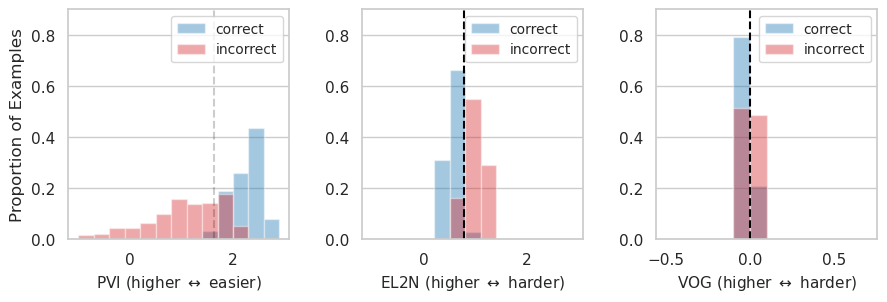

In [11]:
get_prediction_distribution_sexist_labels(dataset = df_final, name =  '')

In [ ]:
def get_prediction_distribution_non_sexist_labels(dataset, name):
    
    sns.set_theme(style="whitegrid")
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (9, 3))
    fig.tight_layout()
    bins = np.arange(-1, 3, 0.3)
    df_non_sexist = dataset[dataset['numeric_labels'] == 0].reset_index(drop = True)
    correct = df_non_sexist[df_sexist['misclassification_number'] < 3].reset_index(drop = True)
    incorrect = df_non_sexist[df_sexist['misclassification_number']  >= 3].reset_index(drop = True)
    correct_pvi, incorrect_pvi = correct['average_pvi'], incorrect['average_pvi']
    correct_el2n, incorrect_el2n = correct['average_el2n'], incorrect['average_el2n']
    correct_vog, incorrect_vog = correct['average_vog'], incorrect['average_vog']
    ax1.hist(data = correct, x = 'average_pvi', weights=np.ones_like(correct_pvi)/len(correct_pvi), label=f'correct',
           bins = bins, alpha=0.4, color='tab:blue')
    ax1.hist(data = incorrect, x = 'average_pvi', weights=np.ones_like(incorrect_pvi)/len(incorrect_pvi), label=f'incorrect',
           bins = bins, alpha=0.4, color='tab:red')
    ax1.legend(loc = 'best',fontsize = 10)
    ax2.hist(correct_el2n, weights=np.ones_like(correct_el2n)/len(correct_el2n), label=f'correct', 
            bins = bins, alpha=0.4, color='tab:blue')
    ax2.hist(incorrect_el2n, weights=np.ones_like(incorrect_el2n)/len(incorrect_el2n), label=f'incorrect',
            bins = bins, alpha=0.4, color='tab:red')
    ax2.legend(loc = 'best',fontsize = 10)
    ax3.hist(correct_vog, weights=np.ones_like(correct_vog)/len(correct_vog), label=f'correct',
            bins = np.arange(-0.5, 0.8, 0.1), alpha=0.4, color='tab:blue')
    ax3.hist(incorrect_vog, weights=np.ones_like(incorrect_vog)/len(incorrect_vog), label=f'incorrect',
           bins = np.arange(-0.5, 0.8, 0.1), alpha=0.4, color='tab:red')
    ax3.legend(loc = 'best',fontsize = 10)
    ax1.vlines(df_sexist['average_pvi'].mean(), 0, 4, linestyles='dashed', color='black', alpha = 0.2)
    ax1.set_ylabel('Proportion of Examples')
    ax1.set_xlabel('PVI (higher $\leftrightarrow$ easier)', fontsize=11)
    ax1.set_ylim([0, 0.9])
    ax2.set_xlabel('EL2N (higher $\leftrightarrow$ harder)', fontsize=11)
    ax2.vlines(df_sexist['average_el2n'].mean(), 0, 3, linestyles='dashed', color='black')
    ax2.set_ylim([0, 0.9])
    ax3.set_ylim([0, 0.9])
    ax3.set_xlabel('VOG (higher $\leftrightarrow$ harder)', fontsize=11)
    ax3.vlines(df_sexist['average_vog'].mean(), 0, 3, linestyles='dashed', color='black')
    ax1.grid(axis='x')
    ax2.grid(axis='x')
    ax3.grid(axis='x')


    #ax1.tick_params(axis="x", labelsize=13) 
    #ax2.tick_params(axis="x", labelsize=13) 
   
    plt.savefig("out_dist_sexist.pdf", bbox_inches = "tight")
    plt.show()